# CIS 5450 Final Project

### Team members: Cedric Chua, Haoxuan Cui, Xinran Wang

In this project, we want to study the effect of the Industrial Revolution on the environment and economics of some major contries that involved in it. We will be looking at the Second Industrial Revolution (mid 19th century to mid 20th century), as this revolution took place in Europe, North America and some parts of Asia. Specifically, for the data analysis and exploration, we are interested in the environmental effect of the Industrial Revolution by measuring these countries' changes in average temperatures and carbon dioxide emissions. Moreover, we want to observe the economic consequences of the Industrial Revolution, indicated by GDP per capita.

We will use 4 datasets for this project: [GDP per capita of each country](https://ourworldindata.org/grapher/gdp-per-capita-maddison-2020), [Sea level change dataset on Kaggle](https://www.kaggle.com/datasets/somesh24/sea-level-change), [carbon dioxide emissions dataset on Kaggle](https://www.kaggle.com/code/alicanakca/carbon-dioxide-emissions-by-nation/input), and [Earth surface temperature dataset on Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data).

The ultimate objective of the project is to gain a better understanding of how major world events might affect the environment in major cities. By analyzing the temperature statistics, sea level data, GDP per capita as well as carbon dioxide emissions in different countries/continents during the Industrial Revolutoin, we hope to identify some patterns and correlations. We also want to identify the long-term effects of these events on temperature trends.

We will be applying a combination of various data analysis techniques. Data preprocessing and cleaning can help us deal with missing values and duplicates. Different types of data visualization can show the trends of data against time change. Time-series machine learning prediction models such as linear regression and LSTM can receive an input of the GDP, CO2 and temperature data of coutries during Industial Revolution, and predict the temperatures in the years after the Industiral Revolution. The models can study the trend of temperature changes, which can be a powerful tool to see the coming impact of Industrial Revolution.


## Module and Data Loading

In [ ]:
!pip install kaggle
!pip install plotly
!pip install ipywidgets>=7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
#Pull Kaggle datasets

!cd /content/drive/MyDrive/545Project
!!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data
!!kaggle datasets download -d somesh24/sea-level-change

['Downloading sea-level-change.zip to /content',
 '',
 '  0% 0.00/7.53k [00:00<?, ?B/s]',
 '',
 '100% 7.53k/7.53k [00:00<00:00, 5.44MB/s]']

In [ ]:
#Unzip Kaggle datasets

!unzip /content/climate-change-earth-surface-temperature-data.zip
!unzip /content/sea-level-change.zip

Archive:  /content/climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  
Archive:  /content/sea-level-change.zip
  inflating: sea_levels_2015.csv     


In [ ]:
#Read CSVs
df_sea_levels = pd.read_csv("sea_levels_2015.csv")
df_carbon = pd.read_csv("/content/drive/MyDrive/545Project/fossil-fuel-co2-emissions-by-nation.csv")
df_gdp = pd.read_csv("/content/drive/MyDrive/545Project/gdp-per-capita-maddison-2020.csv")
df_temperature_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

## Sea Level Dataset

This data shows the change in average sea level for the world's oceans since 1880, using a combination of tide gauge and satellite measurements. It accounts for the height of the ocean surface, regardless of any changes in nearby land. The tide gauge measurements are corrected for slow changes in the size and shape of the oceans over time.

`sea_levels_2015.csv` is the CSV we will be reading the Sea Level values from.



In this part, we check potential null values and do basic data analysis for the Sea Level Dataset

In [ ]:
#check the sea level
print(df_sea_levels.shape)
print(df_sea_levels.head(13))

#so this df contains time, gmsl(Global Mean Sea Level), and gmsl uncertainty
print(df_sea_levels.isnull().sum())
print(df_sea_levels.info())

(1608, 3)
          Time   GMSL  GMSL uncertainty
0   1880-01-15 -183.0              24.2
1   1880-02-15 -171.1              24.2
2   1880-03-15 -164.3              24.2
3   1880-04-15 -158.2              24.2
4   1880-05-15 -158.7              24.2
5   1880-06-15 -159.6              24.2
6   1880-07-15 -159.6              24.2
7   1880-08-15 -161.8              24.2
8   1880-09-15 -158.9              24.2
9   1880-10-15 -150.3              24.2
10  1880-11-15 -144.5              24.2
11  1880-12-15 -134.7              24.2
12  1881-01-15 -136.4              24.2
Time                0
GMSL                0
GMSL uncertainty    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: fl

Checking for duplicate and formatting the time column to datetime formatt

In [ ]:
#there is no duplicate in the dataset
print(df_sea_levels.duplicated().sum())
print(df_sea_levels.describe())

#formatting the date column correctly
import datetime
df_sea_levels.Time=df_sea_levels.Time.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))


0
              GMSL  GMSL uncertainty
count  1608.000000        1608.00000
mean    -66.079540          11.29745
std      62.893171           5.27788
min    -184.500000           6.20000
25%    -117.100000           6.70000
50%     -74.000000          10.10000
75%     -15.375000          14.00000
max      82.400000          24.20000


Extracts the year from the time column, groups the data by year and calculates the mean and uncertainty, and then filters and plots the sea level data with uncertainty bars for the years 1880 to 1920.

     Year        GMSL  GMSL uncertainty
0    1880 -158.725000         24.200000
1    1881 -153.058333         24.200000
2    1882 -169.883333         23.008333
3    1883 -164.591667         22.800000
4    1884 -143.750000         22.200000
..    ...         ...               ...
129  2009   58.016667          6.883333
130  2010   65.750000          7.116667
131  2011   67.300000          7.550000
132  2012   76.083333          8.300000
133  2013   67.725000          8.841667

[134 rows x 3 columns]


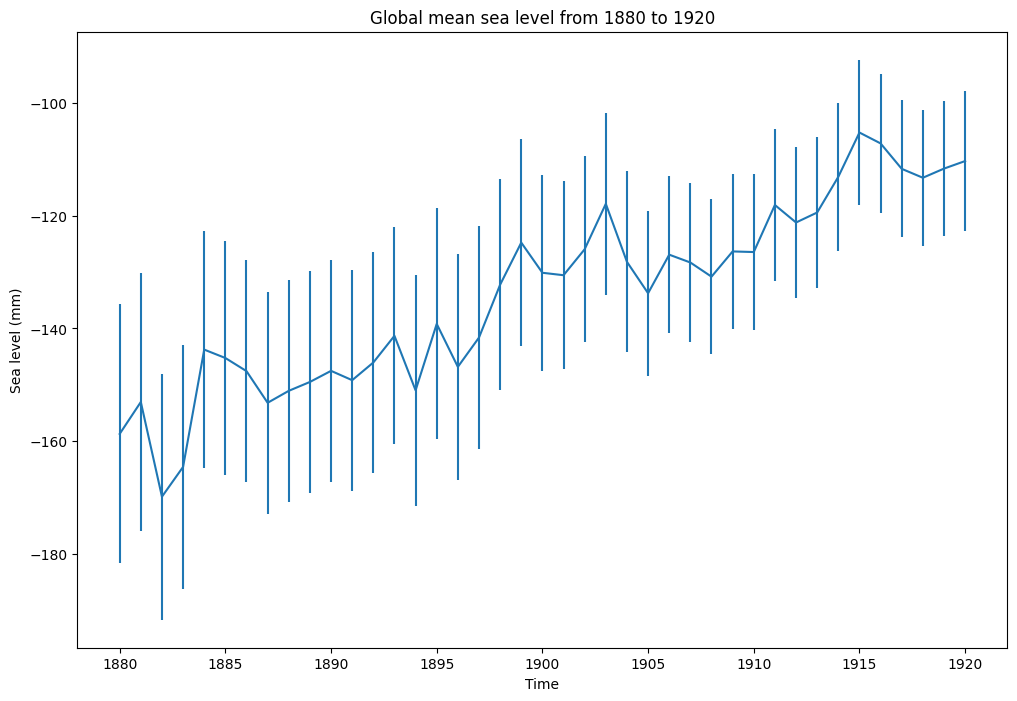

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sea_levels['Year'] = pd.to_datetime(df_sea_levels['Time']).dt.year
df_sea_levels_grouped = df_sea_levels.groupby('Year')[['GMSL', 'GMSL uncertainty']].mean().reset_index()
print(df_sea_levels_grouped)

df_sea_levels_grouped_filtered = df_sea_levels_grouped[(df_sea_levels_grouped.Year >= 1870) & (df_sea_levels_grouped.Year <= 1920)]

# Plot the sea level data with uncertainty bars
plt.figure(figsize=(12, 8)) # Increase the plot size
plt.errorbar(df_sea_levels_grouped_filtered['Year'], df_sea_levels_grouped_filtered['GMSL'], yerr=df_sea_levels_grouped_filtered['GMSL uncertainty']*0.95)
plt.xlabel('Time')
plt.ylabel('Sea level (mm)')
plt.title('Global mean sea level from 1880 to 1920')
plt.show()

Calculates the difference between consecutive values in the 'GMSL' column and find the correspond to the years with the highest and lowest increases in sea level.

In [ ]:
df_sea_levels_grouped_filtered['delta_GMSL'] = df_sea_levels_grouped_filtered['GMSL'].diff()
sorted_df_sea_levels = df_sea_levels_grouped_filtered.sort_values('delta_GMSL', ascending=False)
#find out the biggest increase in gmsl and its corresponding date and how much it increased by
print(sorted_df_sea_levels.iloc[:5]['Year'])
print(sorted_df_sea_levels.iloc[:5]['delta_GMSL'])


print(sorted_df_sea_levels.tail(5)['Year'])
print(sorted_df_sea_levels.tail(5)['delta_GMSL'])

4     1884
15    1895
18    1898
31    1911
23    1903
Name: Year, dtype: int64
4     20.841667
15    11.800000
18     9.391667
31     8.358333
23     8.066667
Name: delta_GMSL, dtype: float64
16    1896
14    1894
24    1904
2     1882
0     1880
Name: Year, dtype: int64
16    -7.633333
14    -9.683333
24   -10.308333
2    -16.825000
0           NaN
Name: delta_GMSL, dtype: float64


<ipython-input-12-81c8688af554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sea_levels_grouped_filtered['delta_GMSL'] = df_sea_levels_grouped_filtered['GMSL'].diff()


## GDP per Capita Dataset

This dataset contains the GDP per capita values for all countries, changing by date. Not all countries in the world contain data from the dates we want to analyze (roughly between 1850 and 1950). Furthermore, some countries' GDP per capita values are not measured yearly. Hence, we must identify which countries contain yearly GDP values from 1850 to 1950.

`gdp-per-capita-maddison-2020.csv` is the CSV we will be reading the GDP values from.

### GDP Per Capita by Countries: Data Preparation and Cleaning

In this part, we check potential null values of this table, and clean it.

In [ ]:
df_gdp.shape

(19876, 5)

In [ ]:
df_gdp.head()

,Entity,Code,Year,GDP per capita,417485-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN
2,Afghanistan,AFG,1952,1189.0,NaN
3,Afghanistan,AFG,1953,1240.0,NaN
4,Afghanistan,AFG,1954,1245.0,NaN


In [ ]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19876 entries, 0 to 19875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              19876 non-null  object 
 1   Code                19651 non-null  object 
 2   Year                19876 non-null  int64  
 3   GDP per capita      19876 non-null  float64
 4   417485-annotations  21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 776.5+ KB


### Number of data entries for each country

The code below shows the countries appeared in the cleaned table, and the number of associated data entries for each country in the table.

In [ ]:
gdp_count_df = df_gdp.groupby(["Entity"]).count().reset_index()
gdp_count_df.rename(columns={"Code": "entry_count"}, inplace=True)
gdp_count_df.drop(["Year", "GDP per capita", "417485-annotations"], axis=1, inplace=True)
gdp_count_df = gdp_count_df.sort_values(by="entry_count", ascending=False)
gdp_count_df

,Entity,entry_count
165,United Kingdom,768
149,Sweden,719
56,France,710
77,Italy,710
111,Netherlands,665
...,...,...
171,Western Europe,0
172,Western Offshoots,0
46,Eastern Europe,0
55,Former Sudan,0


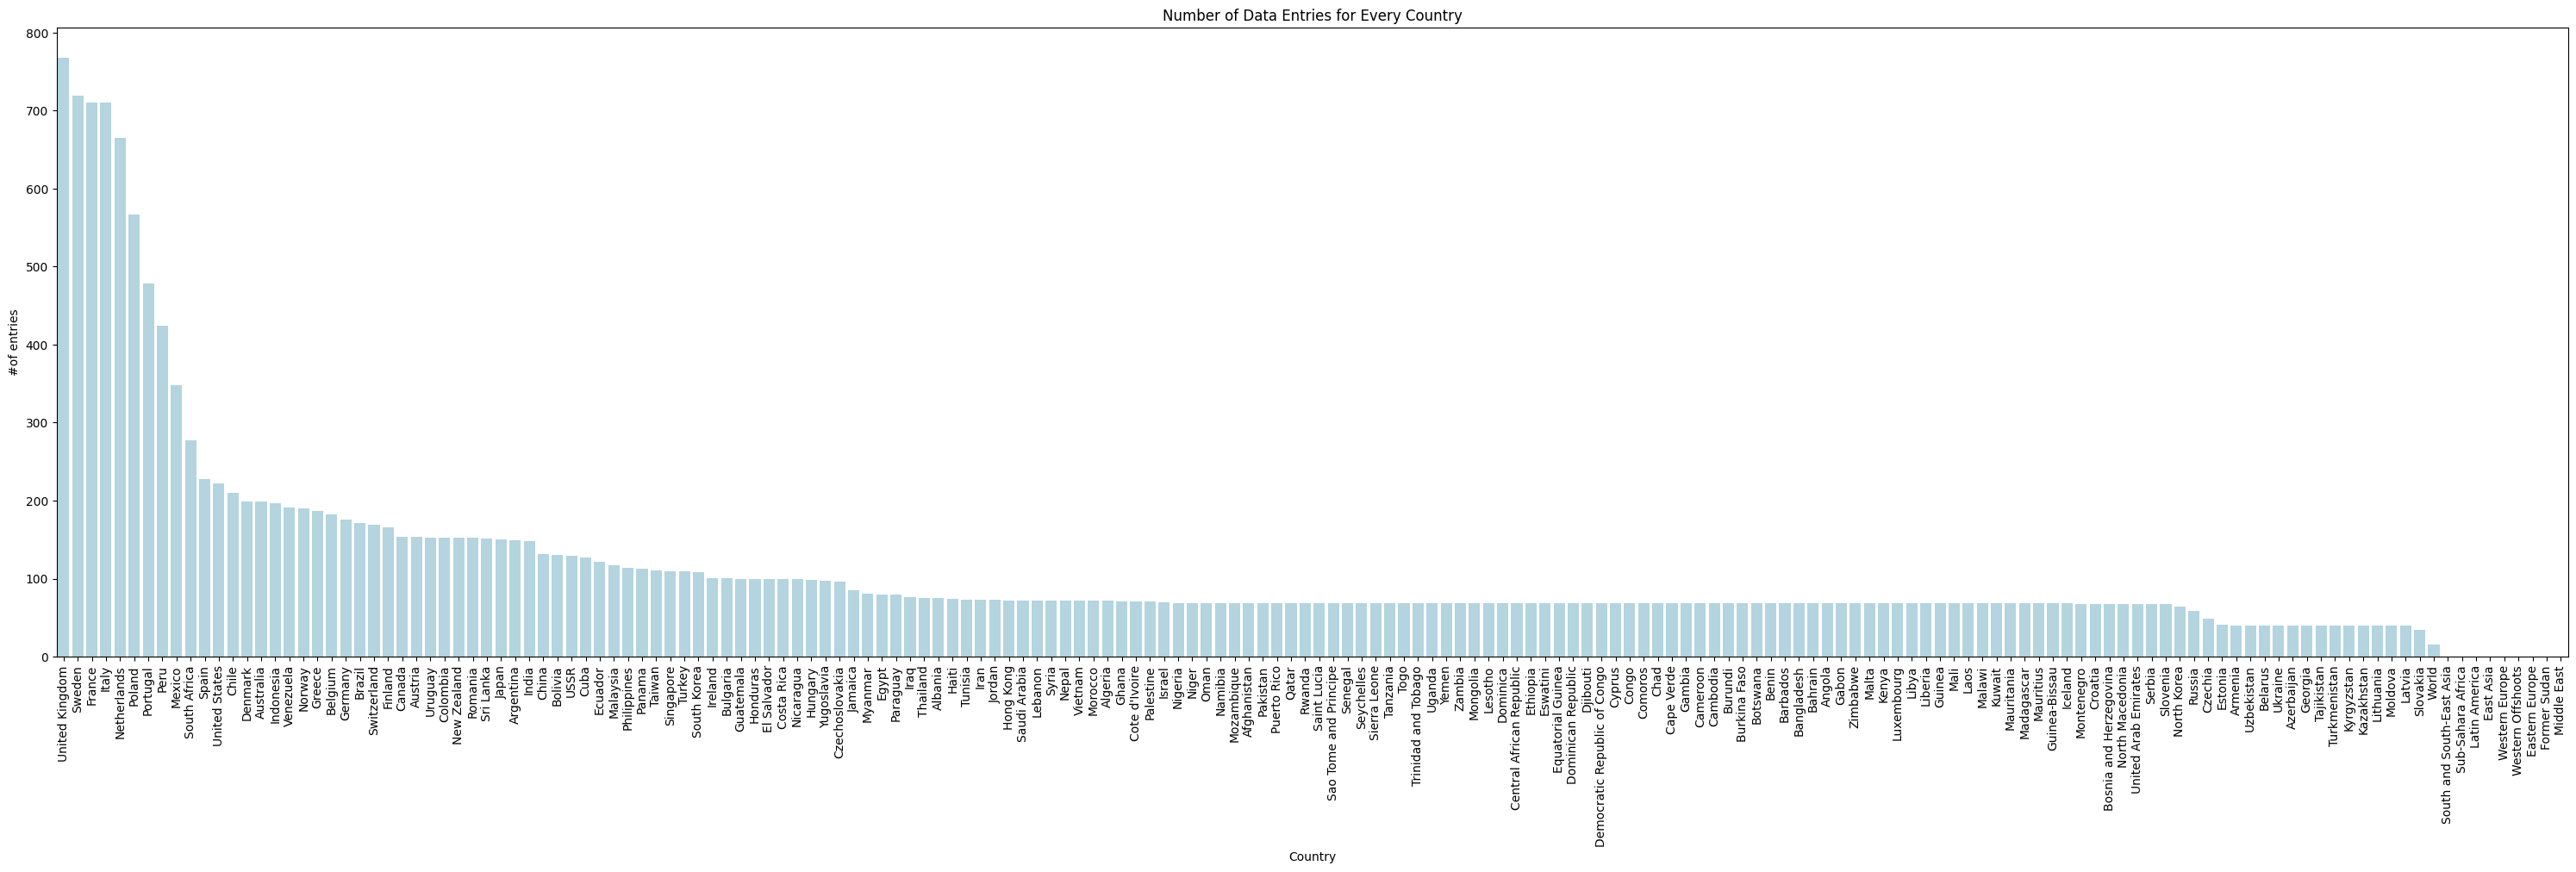

In [ ]:
# Visualize the above table into a bar plot
plt.figure(figsize=(30, 10))
sns.barplot(x='Entity', y='entry_count', data=gdp_count_df, color='lightblue')
plt.xlabel('Country')
plt.ylabel('#of entries')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.title('Number of Data Entries for Every Country')
plt.show()

In [ ]:
#Find the earliest year for GDP data for each country

earliest_gdp = df_gdp.groupby('Entity')['Year'].min().reset_index()
earliest_gdp = earliest_gdp.loc[earliest_gdp['Year'] < 1860]

#Some rows contain the Year '1', which is anomalous. We will drop these from the table
earliest_gdp = earliest_gdp.loc[earliest_gdp['Year'] != 1]

#Drop the World and Regions from the list
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'World']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'Western Europe']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'Western Offshoots']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'Eastern Europe']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'East Asia']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'Sub-Sahara Africa']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'South and South-East Asia']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'Latin America']
earliest_gdp = earliest_gdp.loc[earliest_gdp['Entity'] != 'Argentina']

#List out the countries that have data from 1850 onwards (Industrial Revolution)
early_countries = earliest_gdp.Entity.values

As some countries do not have yearly GDP per capita values, we have to remove them from the list of countries we will be exploring. We will only leave countries that have at least 75 data etnries between 1860 to 1950 (to increase the number of countries we are studying).

In [ ]:
#Group to find countries that have incrementing years (by 1), and not random jumps - e.g. Algeria going from 1870 to 1913
natural_gdp = df_gdp.loc[df_gdp['Entity'].isin(early_countries)]
natural_gdp = natural_gdp.loc[natural_gdp['Year'] > 1860]
natural_gdp = natural_gdp.loc[natural_gdp['Year'] < 1950]
natural_gdp = natural_gdp.groupby('Entity').count()

#Only countries that have data points for every year between 1860 and 1950
natural_gdp = natural_gdp[natural_gdp['Year'] > 75].reset_index()

#List of countries that will be used
list_of_usable_countries = natural_gdp.Entity.values
print(list_of_usable_countries)
print(len(list_of_usable_countries))

['Australia' 'Austria' 'Brazil' 'Canada' 'Chile' 'Colombia' 'Denmark'
 'Finland' 'Germany' 'Indonesia' 'Netherlands' 'New Zealand' 'Norway'
 'Peru' 'South Africa' 'Sri Lanka' 'Sweden' 'United Kingdom'
 'United States' 'Uruguay' 'Venezuela']
21


Now that we have the list of countries to analyze, we will now clean the dataset to check that there are no null values and drop the unnecessary columns.

In [ ]:
#Only take countries that appear in the list for GDP
df_gdp_cleaned = df_gdp.loc[df_gdp['Entity'].isin(list_of_usable_countries)]
df_gdp_cleaned = df_gdp_cleaned.loc[df_gdp_cleaned['Year'] > 1860]
df_gdp_cleaned = df_gdp_cleaned.reset_index().drop(columns = ['index', '417485-annotations'])
print(df_gdp_cleaned.isnull().sum())
print(df_gdp_cleaned)

Entity            0
Code              0
Year              0
GDP per capita    0
dtype: int64
         Entity Code  Year  GDP per capita
0     Australia  AUS  1861        4544.000
1     Australia  AUS  1862        4368.000
2     Australia  AUS  1863        4352.000
3     Australia  AUS  1864        4616.000
4     Australia  AUS  1865        4403.000
...         ...  ...   ...             ...
3240  Venezuela  VEN  2014       20317.000
3241  Venezuela  VEN  2015       18802.000
3242  Venezuela  VEN  2016       15219.000
3243  Venezuela  VEN  2017       12879.135
3244  Venezuela  VEN  2018       10709.950

[3245 rows x 4 columns]


Now that we have the 21 countries which contain yearly GDP values, we will perform some data visualization to better understand the data.

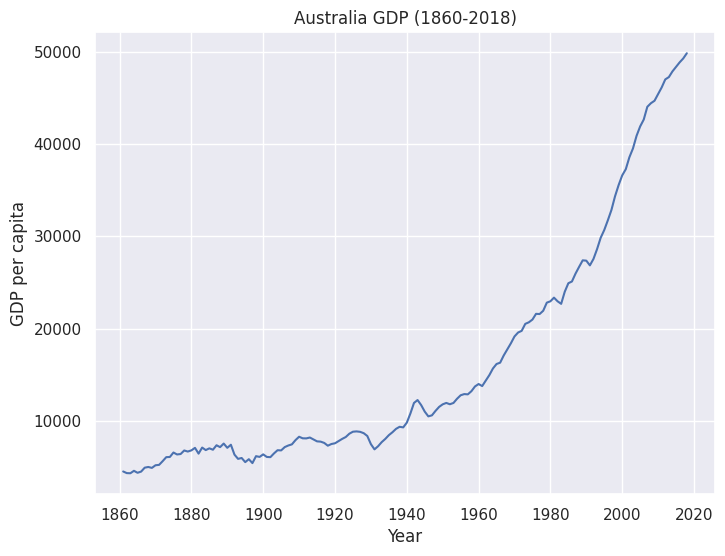

In [ ]:
#Visualize a countries GDP change over the years
australia_gdp = df_gdp_cleaned[df_gdp_cleaned['Entity'] == 'Australia']
australia_graph = australia_gdp[['Year', 'GDP per capita']]
sns.set(rc = {'figure.figsize': (8, 6)})
ax = sns.lineplot(data = australia_graph, x = "Year", y = 'GDP per capita')
ax.set_title('Australia GDP (1860-2018)');

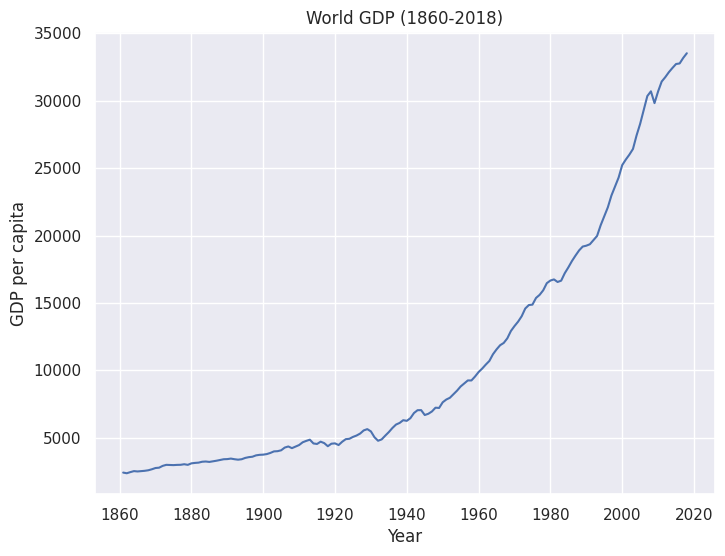

In [ ]:
#Visualize average GDP change over the years
world_gdp = df_gdp_cleaned.groupby('Year')['GDP per capita'].mean().reset_index()
sns.set(rc = {'figure.figsize': (8, 6)})
ax = sns.lineplot(data = world_gdp, x = "Year", y = 'GDP per capita')
ax.set_title('World GDP (1860-2018)');

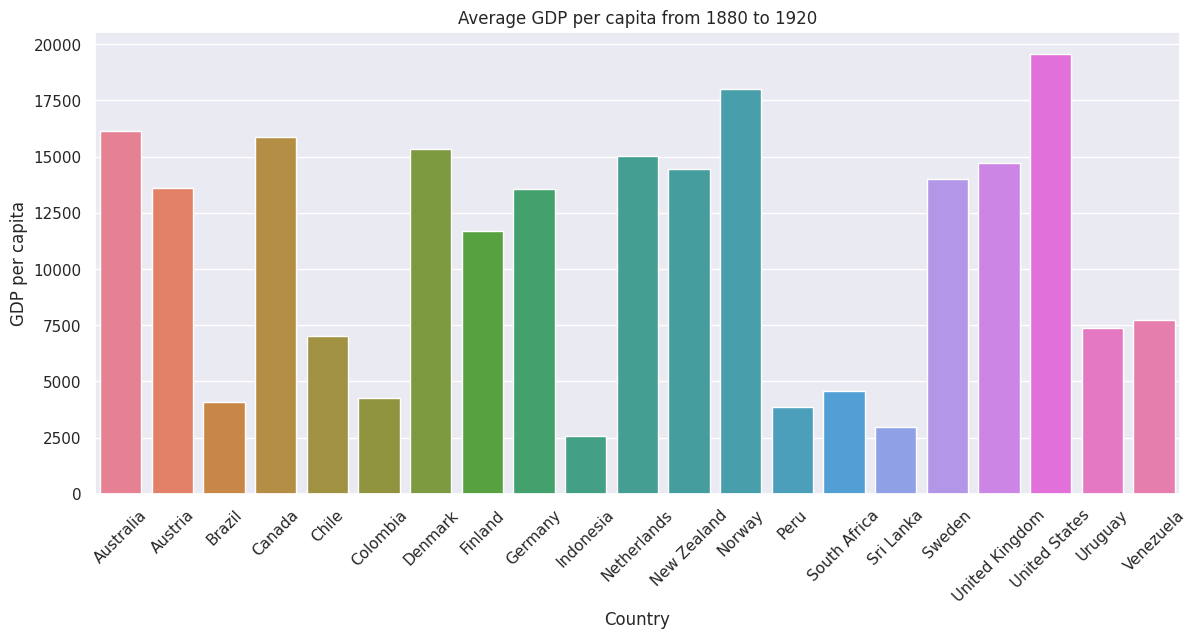

In [ ]:
#Visualize average GDP values from 1880 to 1920 for all 13 countries
average_over_time_gdp = df_gdp_cleaned[df_gdp_cleaned['Year'] >= 1880]
average_over_time_gdp = df_gdp_cleaned[df_gdp_cleaned['Year'] <= 1920]
average_over_time_gdp = df_gdp_cleaned.groupby('Entity')['GDP per capita'].mean().reset_index()
sns.set(rc = {'figure.figsize': (14, 6)})
ax = sns.barplot(data = average_over_time_gdp, x = 'Entity', y = 'GDP per capita', palette = 'husl')
ax.set_xlabel('Country')
ax.set_ylabel('GDP per capita')
ax.set_title('Average GDP per capita from 1880 to 1920')
ax.set_xticklabels(labels = list_of_usable_countries, rotation = 45);

## CO2 Level Dataset
The Carbon Dioxide Emissions by Nation dataset on Kaggle is a comprehensive collection of carbon dioxide emissions by country from the year 1751 to 2017. This dataset includes information on the carbon dioxide emissions of more than 200 countries and is derived from the Carbon Dioxide Information Analysis Center (CDIAC)



In this part, we first filter the dataframe to only 13 countries we are going to use, check potential null values and do basic data analysis and cleaning and have a basic understanding for the CO2 Level Dataset

In [ ]:
countries_of_interest = ['Australia', 'Austria', 'Brazil', 'Canada', 'Chile', 'Colombia',
 'Denmark', 'Finland', 'Germany', 'Indonesia', 'Netherlands', 'New Zealand',
 'Norway', 'Peru', 'South Africa', 'Sri Lanka', 'Sweden', 'United Kingdom',
 'United States of America', 'Uruguay', 'Venezuela']

countries_of_interest_upper = [country.upper() for country in countries_of_interest]
df_carbon_filtered = df_carbon[df_carbon['Country'].isin(countries_of_interest_upper)]

print(df_carbon_filtered)
print(df_carbon_filtered.shape)
print(df_carbon_filtered.head())
print(df_carbon_filtered.isnull().sum())
print(df_carbon_filtered.duplicated().sum())
print(df_carbon_filtered.describe())

       Year                   Country    Total  Solid Fuel  Liquid Fuel  \
0      1751            UNITED KINGDOM     2552        2552            0   
1      1752            UNITED KINGDOM     2553        2553            0   
2      1753            UNITED KINGDOM     2553        2553            0   
3      1754            UNITED KINGDOM     2554        2554            0   
4      1755            UNITED KINGDOM     2555        2555            0   
...     ...                       ...      ...         ...          ...   
17202  2014                    SWEDEN    11841        2183         8822   
17220  2014            UNITED KINGDOM   114486       31081        44274   
17222  2014  UNITED STATES OF AMERICA  1432855      450047       576531   
17223  2014                   URUGUAY     1840           2         1700   
17226  2014                 VENEZUELA    50510         204        28445   

       Gas Fuel  Cement  Gas Flaring  Per Capita  Bunker fuels (Not in Total)  
0             0    

The code below generates a bar plot to show the number of data entries for each country in a filtered carbon emissions dataset.

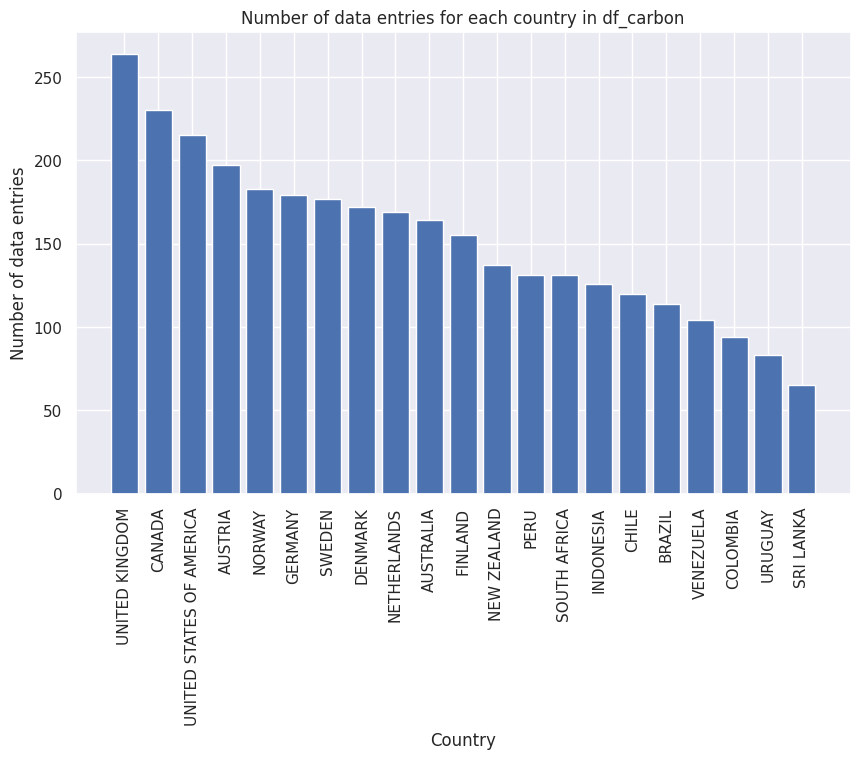

In [ ]:
country_counts = df_carbon_filtered['Country'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of data entries')
plt.title('Number of data entries for each country in df_carbon')
plt.show()

The code below is to transform the original carbon emissions dataset by duplicating the year values to represent each month of the year, creating a new dataset with a row for each country and month combination. This allows for more granular analysis of carbon emissions over time. The code also normalizes the country names to ensure consistency and to facilitate analysis across different datasets.

In [ ]:
#Change countries names to normal case
df_carbon_filtered['Country'] = df_carbon_filtered['Country'].astype(str)
df_carbon_filtered['Country'] = df_carbon_filtered['Country'].apply(lambda x : x.lower().title())


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Duplicate the year values to represent by month (datetime type)
time_carbon = df_carbon_filtered[df_carbon_filtered['Year'] >= 1880]
time_carbon = df_carbon_filtered[df_carbon_filtered['Year'] <= 1920]
expanded_carbon = pd.DataFrame(columns = ['Country', 'Date', 'Total', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring', 'Per Capita', 'Bunker fuels (Not in Total)'])

for index, row in time_carbon.iterrows():
  months = pd.date_range(start = f'{row["Year"]}-01-01', end = f'{row["Year"]}-12-01', freq = "MS")

  for date in months:
    expanded_carbon = expanded_carbon.append({'Country': row['Country'], 'Total': row['Total'], 'Date': date.date(), 'Solid Fuel': row['Solid Fuel'], 'Liquid Fuel': row['Liquid Fuel']
                                              , 'Gas Fuel': row['Gas Fuel'], 'Cement': row['Cement'], 'Gas Flaring': row['Gas Flaring'], 'Per Capita': row['Per Capita']
                                              , 'Bunker fuels (Not in Total)': row['Bunker fuels (Not in Total)']}, ignore_index = True);

<ipython-input-26-439f757e4c5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbon_filtered['Country'] = df_carbon_filtered['Country'].astype(str)
<ipython-input-26-439f757e4c5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbon_filtered['Country'] = df_carbon_filtered['Country'].apply(lambda x : x.lower().title())


## Global Land Temperature Dataset

This dataset records the global earth surface temperature changing by date. It includes 5 `.csv` files: `GlobalTemperatures.csv`, `GlobalLandTemperaturesByCity.csv`, `GlobalLandTemperaturesByCountry.csv`, `GlobalLandTemperaturesByMajorCity.csv`, and `GlobalLandTemperaturesByState.csv`.

The `GlobalTemperatures.csv` includes earth surface temperature statistics in an average manner: global average (maximum/minimum) land temperature in celsius, the 95% confidence interval around the (maximum/minimum) average, global average land and ocean temperature in celsius, and the 95% confidence interval around the global average land and ocean temperature.

The remaining 4 files are the earth surface temperature data categorized by cities, countries, major cities, and states.

In this project, we decided to pick **`GlobalLandTemperaturesByCountry.csv` table** for analysis. Because we want to further join the land temperature table(s) with the other tables, and other tables contain information grouped by countries. So, this would better represent our data categories (in countries), and maintain data consistency across different tables.

### Global Land Temperature Data by Countries: Data Preparation and Cleaning

In this part, we check potential null values of this table, and clean it.

First, we take a look at the table's basic info

In [ ]:
df_temperature_country.shape

(577462, 4)

In [ ]:
df_temperature_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
df_temperature_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Inspect the null values for each entry

The plot below shows the number of non-null entries for each attribute

<Axes: >

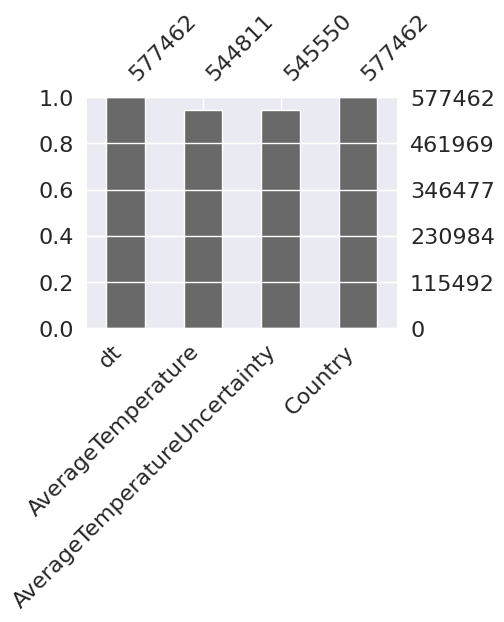

In [ ]:
missingno.bar(df_temperature_country, figsize=(4, 3))

We remove the null values from the dataframe, and call the new cleaned table `df_temperature_country_cleaned`

In [ ]:
print("Null entries in this table:")
to_del = df_temperature_country.isnull().sum()
print(to_del)
df_temperature_country_cleaned = df_temperature_country.dropna(how="any", axis=0)
print("Dataframe shape after cleaning: ", df_temperature_country_cleaned.shape)

Null entries in this table:
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64
Dataframe shape after cleaning:  (544811, 4)


The code below shows that there are 242 different countries that have data entries in this cleaned table

In [ ]:
country_df = df_temperature_country_cleaned.drop_duplicates(subset=["Country"])[["Country"]].reset_index(drop=True)
country_df

,Country
0,Åland
1,Afghanistan
2,Africa
3,Albania
4,Algeria
...,...
237,Virgin Islands
238,Western Sahara
239,Yemen
240,Zambia


### Global Land Temperature Data by Countries: Exploratory Data Analysis on the Entire DataFrame

In this part, we take a look at the cleaned dataframe (`df_temperature_country_cleaned`), and see the general trend and data representation of it.

#### Number of data entries for each country

The code below shows the countries appeared in the cleaned table, and the number of associated data entries for each country in the table.

In [ ]:
country_count_df = df_temperature_country_cleaned.groupby(["Country"]).count().reset_index()
country_count_df.rename(columns={"dt": "entry_count"}, inplace=True)
country_count_df.drop(["AverageTemperature", "AverageTemperatureUncertainty"], axis=1, inplace=True)
country_count_df = country_count_df.sort_values(by="entry_count", ascending=False)
country_count_df

,Country,entry_count
121,Latvia,3166
128,Luxembourg,3166
126,Liechtenstein,3166
112,Jersey,3166
109,Italy,3166
...,...,...
72,Federated States Of Micronesia,1364
90,Guam,1328
160,Northern Mariana Islands,1328
79,French Southern And Antarctic Lands,783


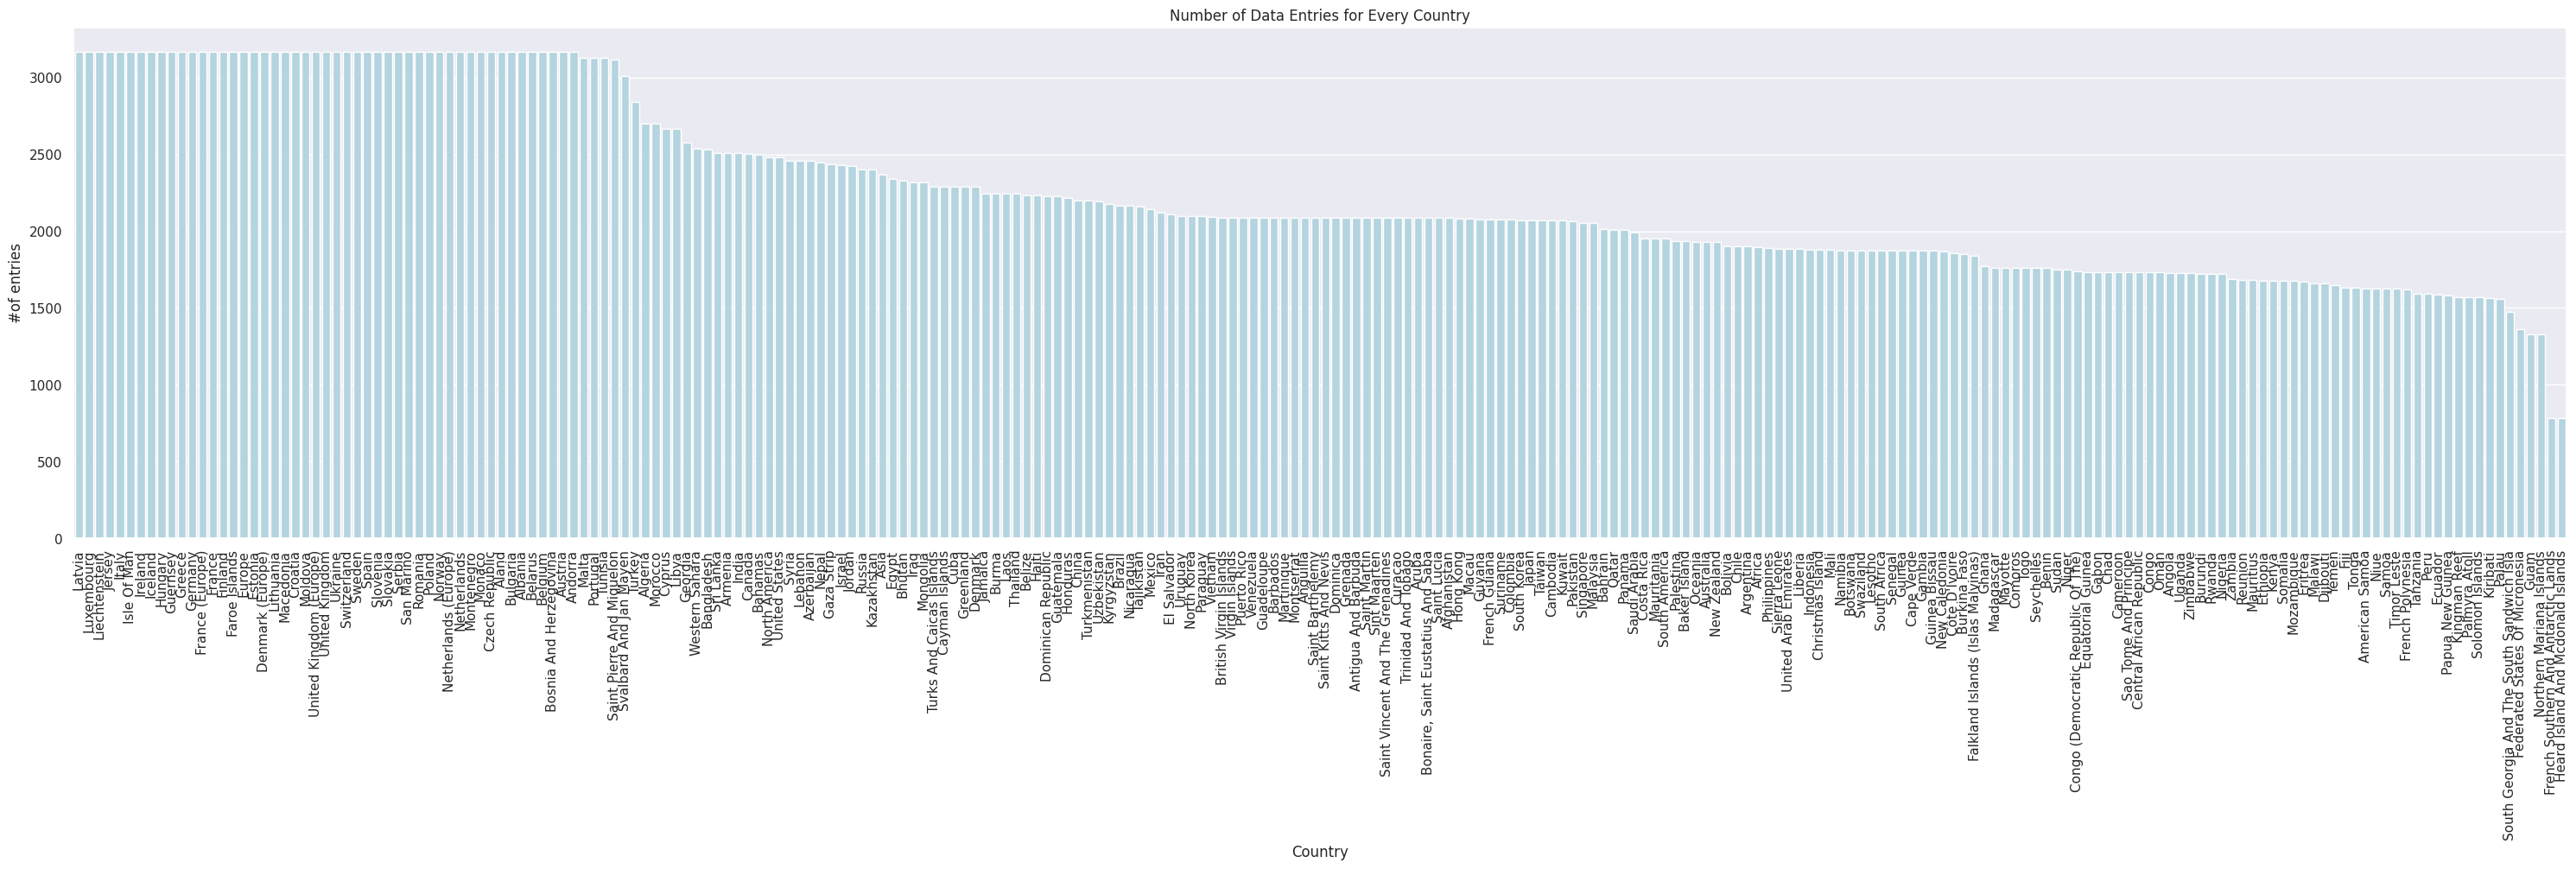

In [ ]:
# Visualize the above table into a bar plot
plt.figure(figsize=(30, 10))
sns.barplot(x='Country', y='entry_count', data=country_count_df, color='lightblue')
plt.xlabel('Country')
plt.ylabel('#of entries')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.title('Number of Data Entries for Every Country')
plt.show()

#### Average land temperatures for every country

We give a simple illustration to compare every country's overall average land temperatures

In [ ]:
mean_temp = df_temperature_country_cleaned.groupby("Country")[["AverageTemperature"]].mean().reset_index()
mean_temp

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965
...,...,...
237,Western Sahara,22.319818
238,Yemen,26.253597
239,Zambia,21.282956
240,Zimbabwe,21.117547


In [ ]:
%matplotlib inline
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.io as pio
pio.renderers.default = "colab"
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = [ dict(
    type = 'choropleth',
    locations = mean_temp["Country"].tolist(),
    z = mean_temp["AverageTemperature"].tolist(),
    locationmode = 'country names',
    text = mean_temp["Country"].tolist(),
    marker = dict(
        line = dict(color = 'rgba(0,0,0)', width = 1)),
        colorbar = dict(autotick = True, tickprefix = '',
        title = 'Average\nTemperature,\n°C')
            )
       ]

In [ ]:
layout = dict(
    title = 'Average Land Temperature for Every Country',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgba(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                lon = 60,
                lat = 10),
         ),
        lonaxis = dict(
                showgrid = True,
                gridcolor = 'rgba(102,102,102)'
            ),
        latxis = dict(
            showgrid = True,
            gridcolor = 'rgba(102,102,102)'
            )
        ),
    )

fig = dict(data = data, layout = layout)
pyo.iplot(fig, validate=False, filename='worldmap')

### Exploratory Data Analysis on Selected Countries

In this part, we will narrow our scope to the list of Industrial Revolution countries. Moreover, we will perform more temperature-related illustrations on these selected countries' data.

#### Data Selection

In [ ]:
# the list of Industrial Revolution countries we selected, 21 total
selected_countries = list_of_usable_countries

# run a simple check to see whether all 21 country names are included in the cleaned dataframe
if set(selected_countries).issubset(set(df_temperature_country_cleaned['Country'])):
    print("The 'Country' column contains every element in the selected country list.")
else:
    print("The 'Country' column does not contain every element in the selected country list.")

The 'Country' column contains every element in the selected country list.


In [ ]:
# filter out all the entries that come from these 21 countries
df_temperature_country_selected = df_temperature_country_cleaned[df_temperature_country_cleaned["Country"].isin(selected_countries)]

In [ ]:
df_temperature_country_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [ ]:
df_temperature_country_selected.shape

(51468, 4)

#### Visualize United States' Yearly Average Temperature against Year

We take United States as an example, show its yearly average temperature variation with respect to the year.

We select the year range to be starting from the year 1850 and onwards, because the fluctuations and missing data before year 1850 are too large. In terms of visualization consistency, we present the figure with this time range.

In [ ]:
america_temp_df = df_temperature_country_selected[df_temperature_country_selected["Country"] == "United States"]
america_temp_df.sort_values("dt", inplace=True)
america_temp_df['dt'] = pd.to_datetime(america_temp_df['dt'])
america_temp_df['year'] = america_temp_df['dt'].dt.year
america_temp_df.shape

(2482, 5)

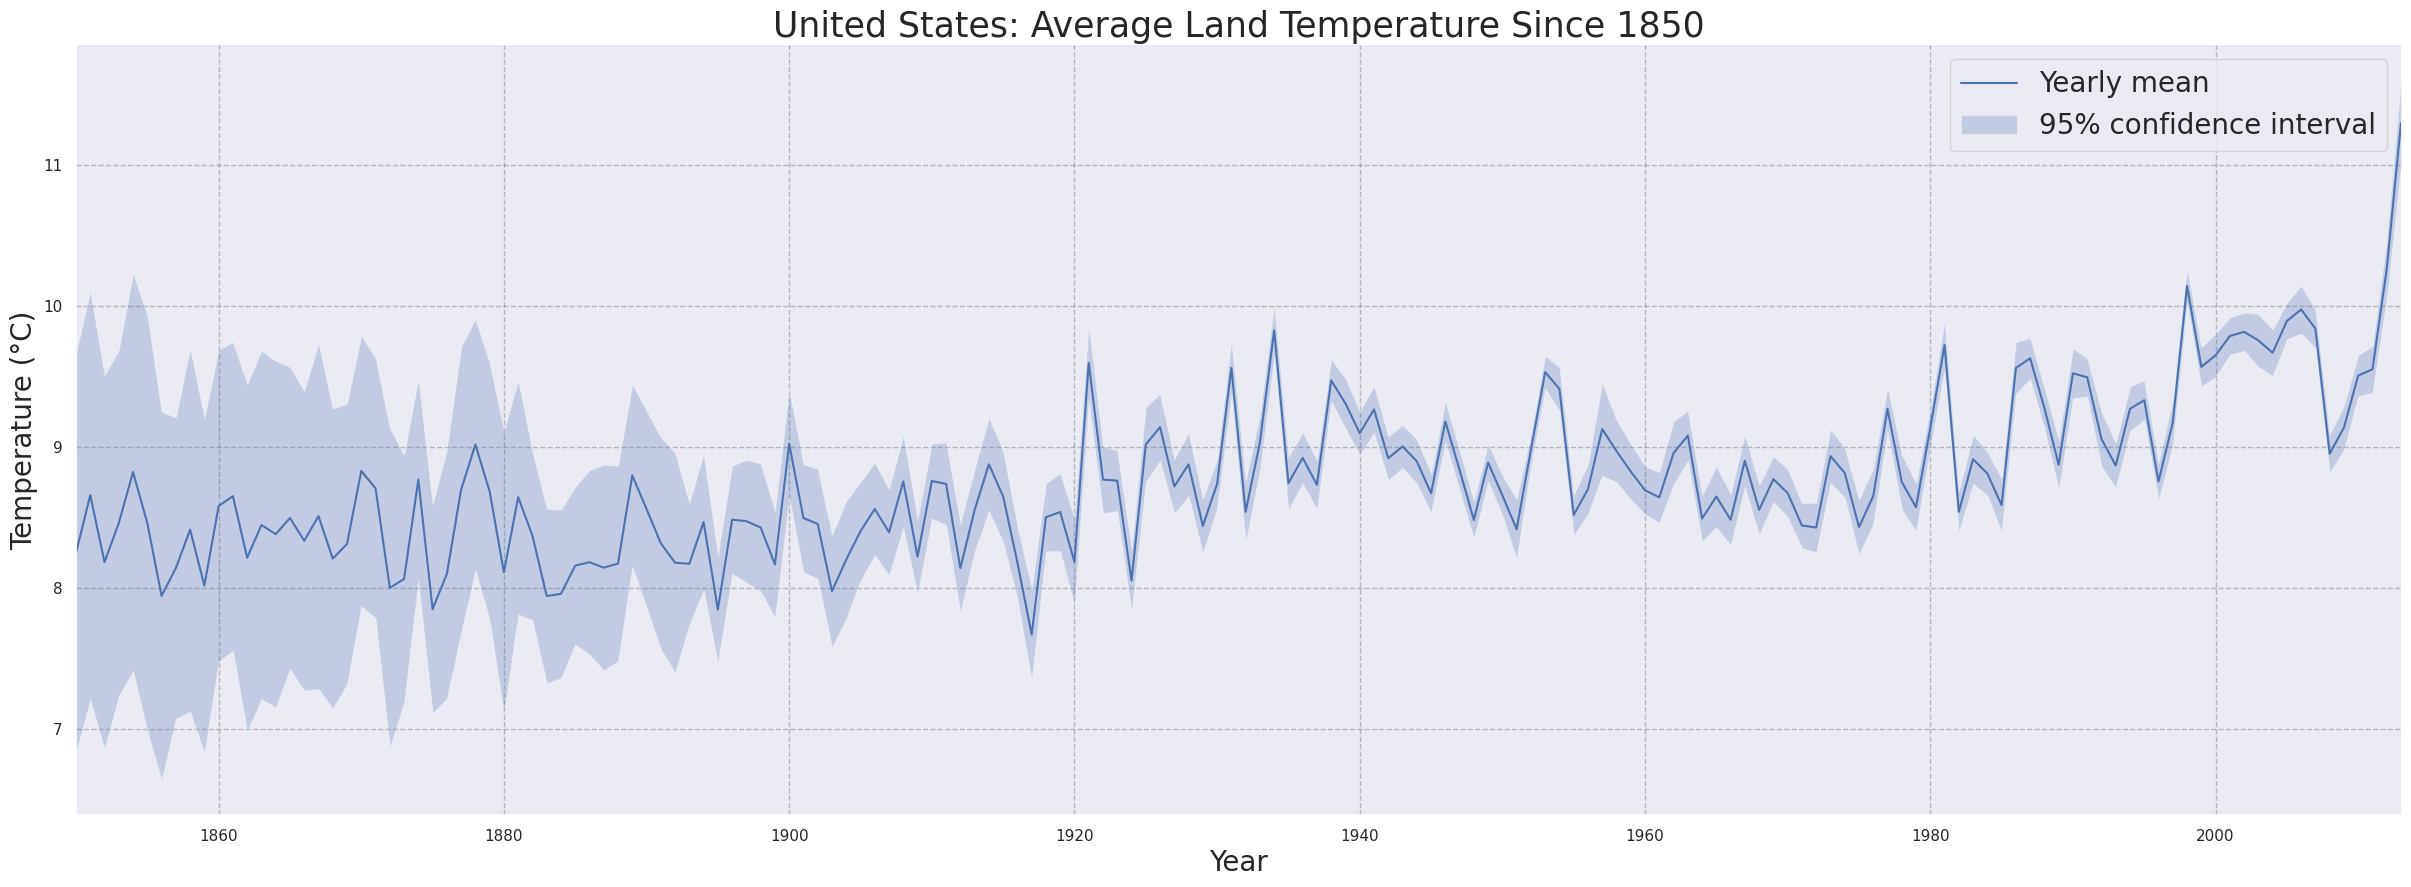

In [ ]:
america_yearly_avg = america_temp_df.groupby('year').mean().reset_index()
america_yearly_avg = america_yearly_avg[america_yearly_avg['year'] >= 1850]

plt.figure(figsize=(30, 10))
plt.plot(america_yearly_avg['year'], america_yearly_avg['AverageTemperature'], label='Yearly mean')

ax = plt.gca()
ax.fill_between(america_yearly_avg['year'], america_yearly_avg['AverageTemperature'] - 0.95 * america_yearly_avg['AverageTemperatureUncertainty'],
                            america_yearly_avg['AverageTemperature'] + 0.95 * america_yearly_avg['AverageTemperatureUncertainty'], alpha=.25, label='95% confidence interval')
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Year', fontsize=20)
plt.ylabel("Temperature (°C)", fontsize=20)
plt.title('United States: Average Land Temperature Since 1850', fontsize=25)
plt.legend(fontsize=20)
sns.despine()

plt.show()

#### Visualize the Overall Yearly Average Temperature of the 21 Industrial Revolution Countries against Year

Then, we want to see the selected Industrial Revolution countries' overall average temperature changes with respect to the time. So, we take the selected 21 countries and show their yearly average temperature variation with respect to the year, starting from the year 1850 and onwards

In [ ]:
df_selected_country_avg = df_temperature_country_selected.sort_values("dt")
df_selected_country_avg['dt'] = pd.to_datetime(df_selected_country_avg['dt'])
df_selected_country_avg['year'] = df_selected_country_avg['dt'].dt.year
df_selected_country_avg.shape

(51468, 5)

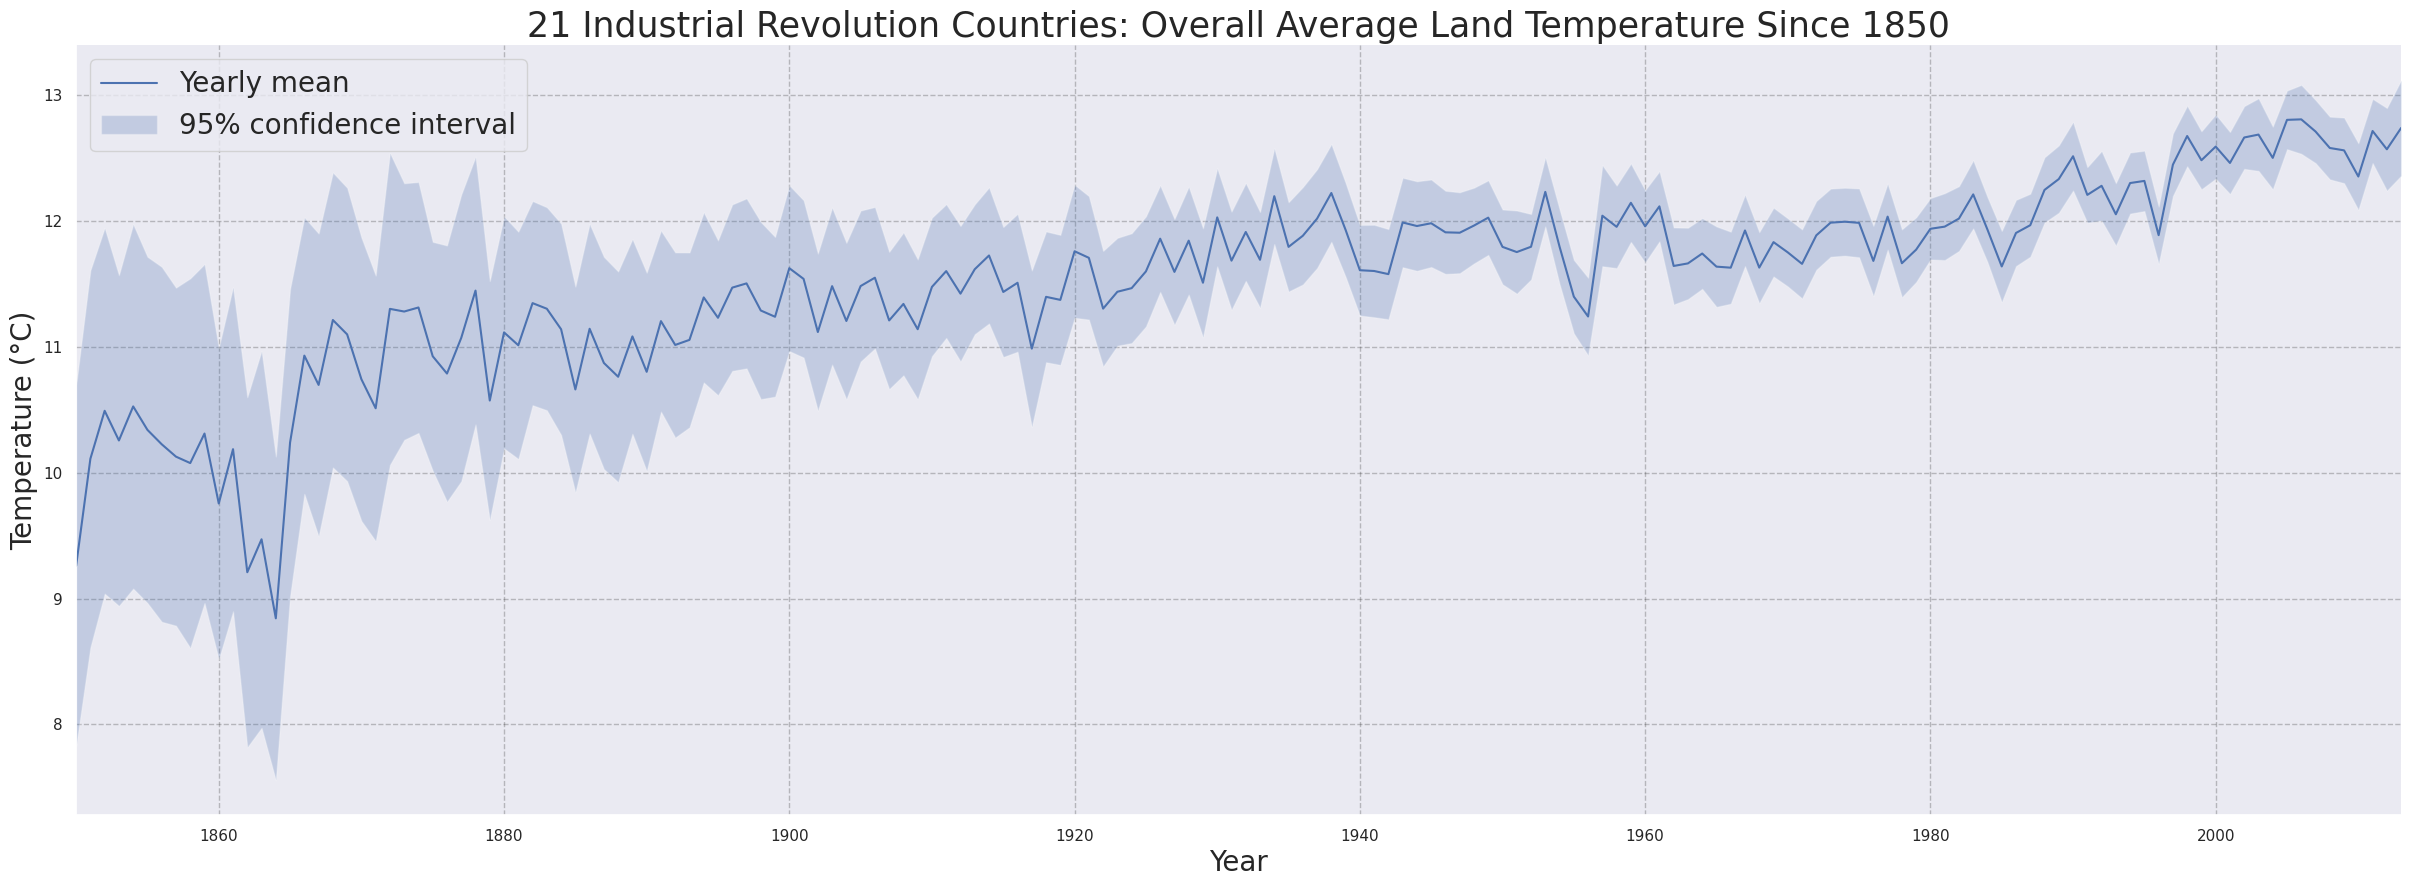

In [ ]:
selected_yearly_avg = df_selected_country_avg.groupby('year').mean().reset_index()
selected_yearly_avg = selected_yearly_avg[selected_yearly_avg['year'] >= 1850]

plt.figure(figsize=(30, 10))
plt.plot(selected_yearly_avg['year'], selected_yearly_avg['AverageTemperature'], label='Yearly mean')

ax = plt.gca()
ax.fill_between(selected_yearly_avg['year'], selected_yearly_avg['AverageTemperature'] - 0.95 * selected_yearly_avg['AverageTemperatureUncertainty'],
                            selected_yearly_avg['AverageTemperature'] + 0.95 * selected_yearly_avg['AverageTemperatureUncertainty'], alpha=.25, label='95% confidence interval')
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Year', fontsize=20)
plt.ylabel("Temperature (°C)", fontsize=20)
plt.title('21 Industrial Revolution Countries: Overall Average Land Temperature Since 1850', fontsize=25)
plt.legend(fontsize=20)
sns.despine()

plt.show()

#### Visualize Every Continent's Yearly Average Temperature against Year

In the 21 selected countries, we want to narrow down to see how every continent's yearly average temperature change over time. We will group the 21 countries by the continent, and calculate their yearly average temperatures from 1850 and onwards.

In [ ]:
# the dictionary that maps every country to its continent
continent_dict = {
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Chile': 'South America',
    'Columbia': 'South America',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'Germany': 'Europe',
    'Indonesia': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Peru': 'South America',
    'South Africa': 'Africa',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Venezuela': 'South America'
}

In [ ]:
df_continents = df_temperature_country_selected.copy()
df_continents["Continent"] = df_continents['Country'].apply(lambda x: continent_dict.get(x))
df_continents['dt'] = pd.to_datetime(df_continents['dt'])
df_continents['year'] = df_continents['dt'].dt.year

continents_yearly_avg = df_continents.groupby(['Continent','year']).mean().reset_index()
continents_yearly_avg = continents_yearly_avg[continents_yearly_avg['year'] >= 1850]
continents_yearly_avg

,Continent,year,AverageTemperature,AverageTemperatureUncertainty
0,Africa,1857,16.448667,1.450333
1,Africa,1858,16.730667,1.550667
2,Africa,1859,16.767000,1.523083
3,Africa,1860,17.192400,1.480500
4,Africa,1861,16.832333,1.395417
...,...,...,...,...
1195,South America,2009,20.014867,0.301467
1196,South America,2010,20.036017,0.317950
1197,South America,2011,19.849433,0.297867
1198,South America,2012,20.129450,0.339400


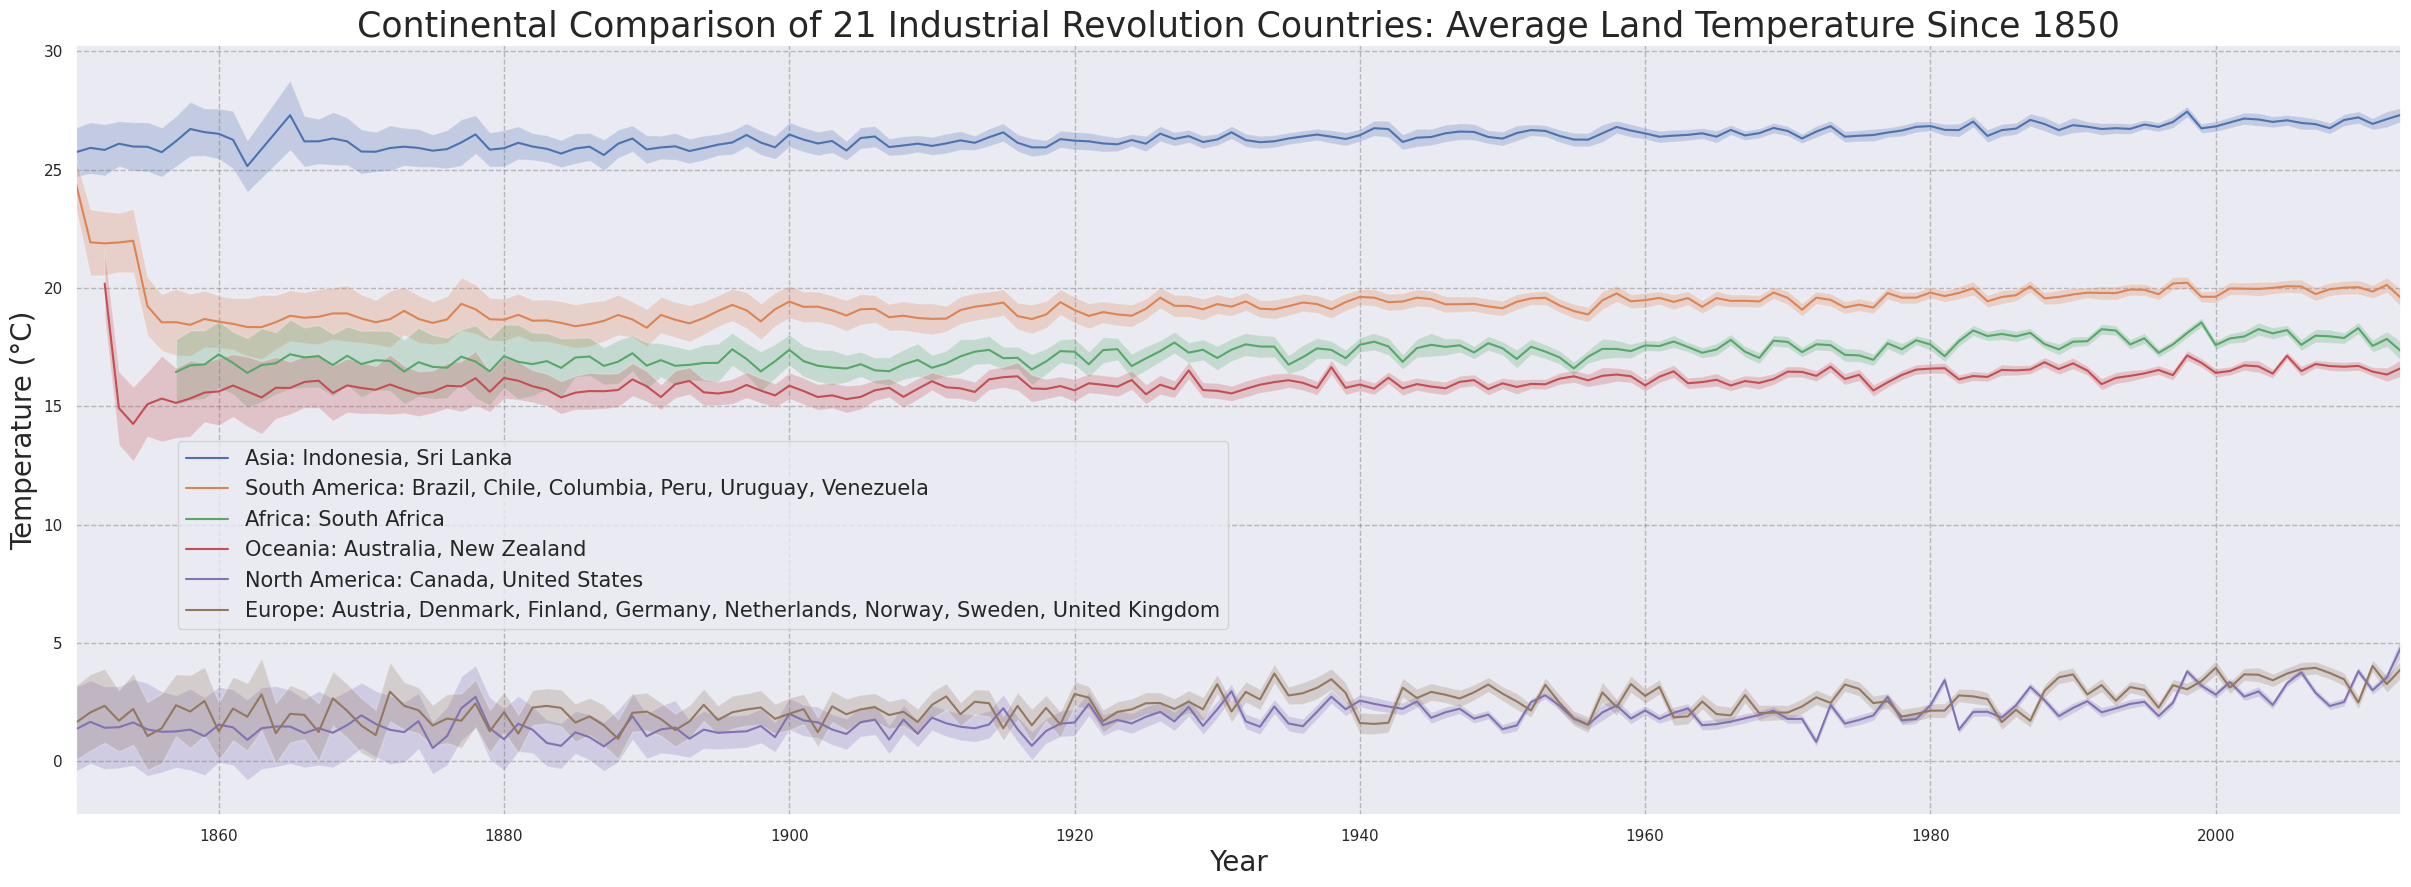

In [ ]:
country_lst = ['Indonesia, Sri Lanka', 'Brazil, Chile, Columbia, Peru, Uruguay, Venezuela', 'South Africa', 'Australia, New Zealand', 'Canada, United States', 'Austria, Denmark, Finland, Germany, Netherlands, Norway, Sweden, United Kingdom']
continent_lst = ['Asia', 'South America', 'Africa', 'Oceania', 'North America', 'Europe']
plt.figure(figsize=(30, 10))
for c in range(6):
  cur_df = continents_yearly_avg[continents_yearly_avg['Continent'] == continent_lst[c]]
  plt.plot(cur_df['year'], cur_df['AverageTemperature'], label=continent_lst[c] + ": " + country_lst[c])
  ax = plt.gca()
  ax.fill_between(cur_df['year'], cur_df['AverageTemperature'] - 0.95 * cur_df['AverageTemperatureUncertainty'], cur_df['AverageTemperature'] + 0.95 * cur_df['AverageTemperatureUncertainty'], alpha=.25)
  ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)

plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Year', fontsize=20)
plt.ylabel("Temperature (°C)", fontsize=20)
plt.title('Continental Comparison of 21 Industrial Revolution Countries: Average Land Temperature Since 1850', fontsize=25)
plt.legend(fontsize=15, loc='upper right', bbox_to_anchor=(0.5, 0.5))

plt.show()

### Joining the Datasets

In this part, we will join the GDP per capita dataset with the Temperature dataset and CO2 emissions dataset

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Duplicate the year values to represent by month (datetime type)
time_gdp = df_gdp_cleaned[df_gdp_cleaned['Year'] >= 1870]
time_gdp = time_gdp[time_gdp['Year'] <= 1920]
expanded_gdp = pd.DataFrame(columns = ['Entity', 'Code', 'Date', 'GDP per capita'])

for index, row in time_gdp.iterrows():
  months = pd.date_range(start = f'{row["Year"]}-01-01', end = f'{row["Year"]}-12-01', freq = "MS")

  for date in months:
    expanded_gdp = expanded_gdp.append({'Entity': row['Entity'], 'Code': row['Code'], 'Date': date.date(), 'GDP per capita': row['GDP per capita']}, ignore_index = True);

gdp_final = expanded_gdp.rename(columns = {'Entity': 'Country'})
gdp_final['Date'] = pd.to_datetime(gdp_final['Date'])

In [ ]:
temperature_final = df_temperature_country_selected.rename(columns = {'dt': 'Date'})
temperature_final = temperature_final[temperature_final['Date'] >= '1870-01-01']
temperature_final = temperature_final[temperature_final['Date'] <= '1920-12-01']
temperature_final['Date'] = pd.to_datetime(temperature_final['Date'])
temperature_final = temperature_final.reset_index(drop = True)

In [ ]:
carbon_final = expanded_carbon.copy()
carbon_final['Date'] = pd.to_datetime(carbon_final['Date'])
carbon_final

,Country,Date,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,United Kingdom,1751-01-01,2552,2552,0,0,0,0,0.0,0
1,United Kingdom,1751-02-01,2552,2552,0,0,0,0,0.0,0
2,United Kingdom,1751-03-01,2552,2552,0,0,0,0,0.0,0
3,United Kingdom,1751-04-01,2552,2552,0,0,0,0,0.0,0
4,United Kingdom,1751-05-01,2552,2552,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
15835,Venezuela,1920-08-01,41,17,23,0,0,0,0.0,0
15836,Venezuela,1920-09-01,41,17,23,0,0,0,0.0,0
15837,Venezuela,1920-10-01,41,17,23,0,0,0,0.0,0
15838,Venezuela,1920-11-01,41,17,23,0,0,0,0.0,0


In [ ]:
complete_df = pd.merge(gdp_final, temperature_final, how = 'left', left_on = ['Country', 'Date'], right_on = ['Country', 'Date'])
complete_df = pd.merge(complete_df, carbon_final, how = 'left', left_on = ['Country', 'Date'], right_on = ['Country', 'Date'])
complete_df

,Country,Code,Date,GDP per capita,AverageTemperature,AverageTemperatureUncertainty,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,Australia,AUS,1870-01-01,5217.0,27.433,1.384,164,164,0,0,0,0,0.0,0
1,Australia,AUS,1870-02-01,5217.0,27.090,1.601,164,164,0,0,0,0,0.0,0
2,Australia,AUS,1870-03-01,5217.0,24.943,1.284,164,164,0,0,0,0,0.0,0
3,Australia,AUS,1870-04-01,5217.0,21.743,1.291,164,164,0,0,0,0,0.0,0
4,Australia,AUS,1870-05-01,5217.0,17.855,1.256,164,164,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,Venezuela,VEN,1920-08-01,1903.0,24.665,0.400,41,17,23,0,0,0,0.0,0
12740,Venezuela,VEN,1920-09-01,1903.0,24.771,0.523,41,17,23,0,0,0,0.0,0
12741,Venezuela,VEN,1920-10-01,1903.0,24.833,0.832,41,17,23,0,0,0,0.0,0
12742,Venezuela,VEN,1920-11-01,1903.0,24.601,0.834,41,17,23,0,0,0,0.0,0


## An Overview of Joined Datasets

In [ ]:
complete_df.shape

(12744, 14)

In [ ]:
complete_df.dtypes

Country                                  object
Code                                     object
Date                             datetime64[ns]
GDP per capita                          float64
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Total                                    object
Solid Fuel                               object
Liquid Fuel                              object
Gas Fuel                                 object
Cement                                   object
Gas Flaring                              object
Per Capita                              float64
Bunker fuels (Not in Total)              object
dtype: object

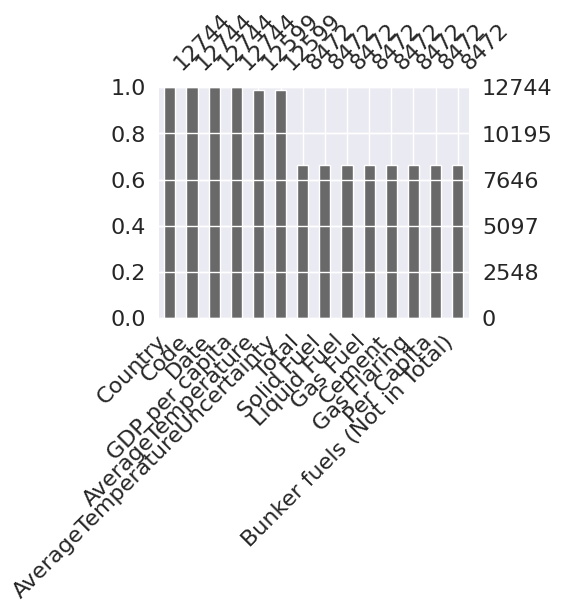

In [ ]:
missingno.bar(complete_df, figsize=(4, 3));

We see that some of the carbon values have null values. Hence, we must fill the values with the last observable values using Panda's fillna command.

In [ ]:
complete_df = complete_df.fillna(method = 'ffill')

In [ ]:
complete_df[complete_df['Total'].isna()]

,Country,Code,Date,GDP per capita,AverageTemperature,AverageTemperatureUncertainty,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)


We now see that there are no more null values in our dataset.

In [ ]:
complete_df

,Country,Code,Date,GDP per capita,AverageTemperature,AverageTemperatureUncertainty,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,Australia,AUS,1870-01-01,5217.0,27.433,1.384,164,164,0,0,0,0,0.0,0
1,Australia,AUS,1870-02-01,5217.0,27.090,1.601,164,164,0,0,0,0,0.0,0
2,Australia,AUS,1870-03-01,5217.0,24.943,1.284,164,164,0,0,0,0,0.0,0
3,Australia,AUS,1870-04-01,5217.0,21.743,1.291,164,164,0,0,0,0,0.0,0
4,Australia,AUS,1870-05-01,5217.0,17.855,1.256,164,164,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,Venezuela,VEN,1920-08-01,1903.0,24.665,0.400,41,17,23,0,0,0,0.0,0
12740,Venezuela,VEN,1920-09-01,1903.0,24.771,0.523,41,17,23,0,0,0,0.0,0
12741,Venezuela,VEN,1920-10-01,1903.0,24.833,0.832,41,17,23,0,0,0,0.0,0
12742,Venezuela,VEN,1920-11-01,1903.0,24.601,0.834,41,17,23,0,0,0,0.0,0


## Predictive Model for the Industrial Revolution on GDP, CO2 emissions and Temperature

### Data Normalization

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

We will perform data normalization (using MinMaxScaler) on all numeric columns in the dataframe.

In [ ]:
numeric_columns = ['GDP per capita', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Total', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring', 'Per Capita', 'Bunker fuels (Not in Total)']

scaler = MinMaxScaler()

scaled_df = complete_df.copy()
scaled_df[numeric_columns] = scaler.fit_transform(scaled_df[numeric_columns])
scaled_df = scaled_df.drop(columns = ['Country', 'Code'])

In [ ]:
scaled_df

,Date,GDP per capita,AverageTemperature,AverageTemperatureUncertainty,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1870-01-01,0.458950,0.972569,0.157578,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
1,1870-02-01,0.458950,0.967359,0.184230,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
2,1870-03-01,0.458950,0.934749,0.145296,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
3,1870-04-01,0.458950,0.886145,0.146156,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
4,1870-05-01,0.458950,0.827091,0.141857,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12739,1920-08-01,0.117698,0.930526,0.036723,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0
12740,1920-09-01,0.117698,0.932136,0.051830,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0
12741,1920-10-01,0.117698,0.933078,0.089781,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0
12742,1920-11-01,0.117698,0.929554,0.090027,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0


We need to convert the Data timestamp type into an integer. Hence, we will use January 1, 1870 as date 0 (value 0), and each following month to be 1 more than the previous.

In [ ]:
import time
start = '1870/01/01'
timestamp = time.mktime(datetime.datetime.strptime(start, "%Y/%m/%d").timetuple())
timestamp

-3155673600.0

In [ ]:
time_adjusted_df = scaled_df.copy()
time_adjusted_df['Date'] = time_adjusted_df['Date'].apply(lambda x: int(round(x.timestamp())) - timestamp)
onemonthval = time_adjusted_df.iloc[2]['Date']
time_adjusted_df['Date'] = time_adjusted_df['Date'].apply(lambda x: int(x / onemonthval))
time_adjusted_df

,Date,GDP per capita,AverageTemperature,AverageTemperatureUncertainty,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,0,0.458950,0.972569,0.157578,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
1,0,0.458950,0.967359,0.184230,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
2,1,0.458950,0.934749,0.145296,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
3,1,0.458950,0.886145,0.146156,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
4,2,0.458950,0.827091,0.141857,0.001116,0.001130,0.099189,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12739,313,0.117698,0.930526,0.036723,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0
12740,313,0.117698,0.932136,0.051830,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0
12741,314,0.117698,0.933078,0.089781,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0
12742,314,0.117698,0.929554,0.090027,0.000274,0.000117,0.103972,0.0,0.0,0.0,0.0,0.0


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target_variable = 'AverageTemperature'


df = time_adjusted_df.copy()


X = df.drop(target_variable, axis=1)
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 0.026292156786096112
R-squared score: 0.3233557980904136


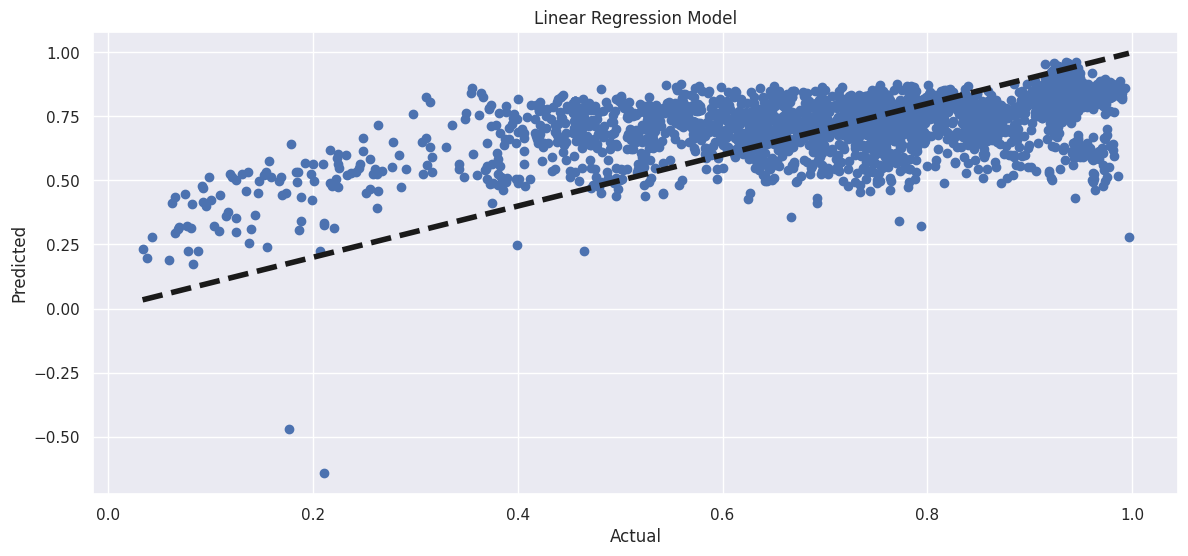

In [ ]:
# Make predictions on test set

# Plot the predicted values against the actual values
ax_linear = plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model')
plt.show()
linear_scatter_x = y_test
linear_scatter_y = y_pred
linear_x = [y_test.min(), y_test.max()]
linear_y = [y_test.min(), y_test.max()]

The above linear regression analysis demonstrated a moderate positive correlation between the independent variables and the average temperature. The mean squared error value of 0.0263 suggests that the model has a moderate level of accuracy in predicting the target variable. However, the R-squared score of 0.32 shows that only about 32% of the variation in the target variable can be explained by the predictor variables. Due to the complex and dynamic nature of climate patterns, the model had limitations in accurately predicting the temperature. Therefore, it raised the question of whether other machine learning models could produce more accurate results. To explore this possibility, our team experimented with a TensorFlow LSTM model below.

### TensorFlow LSTM Predictive Model

To find a Machine Learning model that yields better accuracy and modelling score that a normal Linear Regression model, we have decided to experiment using a TensorFlow LSTM model. Here, we must first convert our dataset such that it can be interpreted as a "supervised learning" problem - an input suitable for a LSTM model. We are essentially duplicating our data into two "timesteps" - the current data of time (t), and the previous data of time (t-1).

We will now convert our dataset to a supervised learning dataset, so that it can be fed into the LSTM.

In [ ]:
#converting series to supervised learning, n_out = how many steps to shift data backwards
def series_to_supervised(df, n_out):
  n_vars = df.shape[1]
  cols = []
  names = []
  cols.append(df.shift(1))
  names += [('%s(t-%d)' % (df.columns[j], 1)) for j in range(n_vars)]
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('%s(t)' % (df.columns[j])) for j in range(n_vars)]
    else:
	    names += [('%s(t+%d)' % (df.columns[j], i)) for j in range(n_vars)]

  final = pd.concat(cols, axis = 1)
  final.columns = names
  final.dropna(inplace = True)
  return final

supervised_df = series_to_supervised(time_adjusted_df, 1)

In [ ]:
supervised_df.head(5)

,Date(t-1),GDP per capita(t-1),AverageTemperature(t-1),AverageTemperatureUncertainty(t-1),Total(t-1),Solid Fuel(t-1),Liquid Fuel(t-1),Gas Fuel(t-1),Cement(t-1),Gas Flaring(t-1),...,AverageTemperature(t),AverageTemperatureUncertainty(t),Total(t),Solid Fuel(t),Liquid Fuel(t),Gas Fuel(t),Cement(t),Gas Flaring(t),Per Capita(t),Bunker fuels (Not in Total)(t)
1,0.0,0.45895,0.972569,0.157578,0.001116,0.00113,0.099189,0.0,0.0,0.0,...,0.967359,0.184230,0.001116,0.00113,0.099189,0.0,0.0,0.0,0.0,0.0
2,0.0,0.45895,0.967359,0.184230,0.001116,0.00113,0.099189,0.0,0.0,0.0,...,0.934749,0.145296,0.001116,0.00113,0.099189,0.0,0.0,0.0,0.0,0.0
3,1.0,0.45895,0.934749,0.145296,0.001116,0.00113,0.099189,0.0,0.0,0.0,...,0.886145,0.146156,0.001116,0.00113,0.099189,0.0,0.0,0.0,0.0,0.0
4,1.0,0.45895,0.886145,0.146156,0.001116,0.00113,0.099189,0.0,0.0,0.0,...,0.827091,0.141857,0.001116,0.00113,0.099189,0.0,0.0,0.0,0.0,0.0
5,2.0,0.45895,0.827091,0.141857,0.001116,0.00113,0.099189,0.0,0.0,0.0,...,0.789514,0.139401,0.001116,0.00113,0.099189,0.0,0.0,0.0,0.0,0.0


We will split the dataset into inputs and outputs (average temperature) as well as split it into 80% test data and 20% training data.

In [ ]:
X = supervised_df.drop(columns = ['AverageTemperature(t)'])
y = supervised_df['AverageTemperature(t)']

In [ ]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = seed)

In [ ]:
X_train.head(5)

,Date(t-1),GDP per capita(t-1),AverageTemperature(t-1),AverageTemperatureUncertainty(t-1),Total(t-1),Solid Fuel(t-1),Liquid Fuel(t-1),Gas Fuel(t-1),Cement(t-1),Gas Flaring(t-1),...,GDP per capita(t),AverageTemperatureUncertainty(t),Total(t),Solid Fuel(t),Liquid Fuel(t),Gas Fuel(t),Cement(t),Gas Flaring(t),Per Capita(t),Bunker fuels (Not in Total)(t)
8485,272.0,0.088042,0.865594,0.092729,0.002876,0.001420,0.143897,0.0,0.0,0.0,...,0.088042,0.164087,0.002876,0.001420,0.143897,0.0,0.0,0.0,0.0,0.0
7255,269.0,0.767353,0.646268,0.044215,0.007868,0.007927,0.099189,0.0,0.0,0.0,...,0.767353,0.061901,0.007868,0.007927,0.099189,0.0,0.0,0.0,0.0,0.0
1567,176.0,0.016785,0.906361,0.053918,0.027144,0.026870,0.113121,0.0,0.0,0.0,...,0.016785,0.059813,0.027144,0.026870,0.113121,0.0,0.0,0.0,0.0,0.0
5460,290.0,0.403447,0.578389,0.031933,0.935735,0.941436,0.115409,0.0,0.0,0.0,...,0.406228,0.043847,0.980368,0.986372,0.114993,0.0,0.0,0.0,0.0,0.0
12218,43.0,0.121817,0.941310,0.142225,0.878394,0.885635,0.057392,0.0,0.0,0.0,...,0.121817,0.059813,0.878394,0.885635,0.057392,0.0,0.0,0.0,0.0,0.0


The input shape has to be refitted into a 3D array for (samples, timestamp, features). This is so it fits the LSTM input.

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10194, 1, 23), (2549, 1, 23), (10194,), (2549,))

### LSTM Model Training

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 64, validation_data = (X_test, y_test), verbose = 1, shuffle = False)

Epoch 1/50
160/160 [==============================] - 5s 12ms/step - loss: 0.2019 - val_loss: 0.1360
Epoch 2/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1448 - val_loss: 0.1159
Epoch 3/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1238 - val_loss: 0.0879
Epoch 4/50
160/160 [==============================] - 1s 9ms/step - loss: 0.1010 - val_loss: 0.0726
Epoch 5/50
160/160 [==============================] - 2s 11ms/step - loss: 0.0959 - val_loss: 0.0748
Epoch 6/50
160/160 [==============================] - 2s 12ms/step - loss: 0.0913 - val_loss: 0.1256
Epoch 7/50
160/160 [==============================] - 1s 9ms/step - loss: 0.0871 - val_loss: 0.0534
Epoch 8/50
160/160 [==============================] - 1s 8ms/step - loss: 0.0797 - val_loss: 0.0592
Epoch 9/50
160/160 [==============================] - 1s 8ms/step - loss: 0.0771 - val_loss: 0.0653
Epoch 10/50
160/160 [==============================] - 1s 8ms/step - loss: 0.0786 - val_loss: 0.0

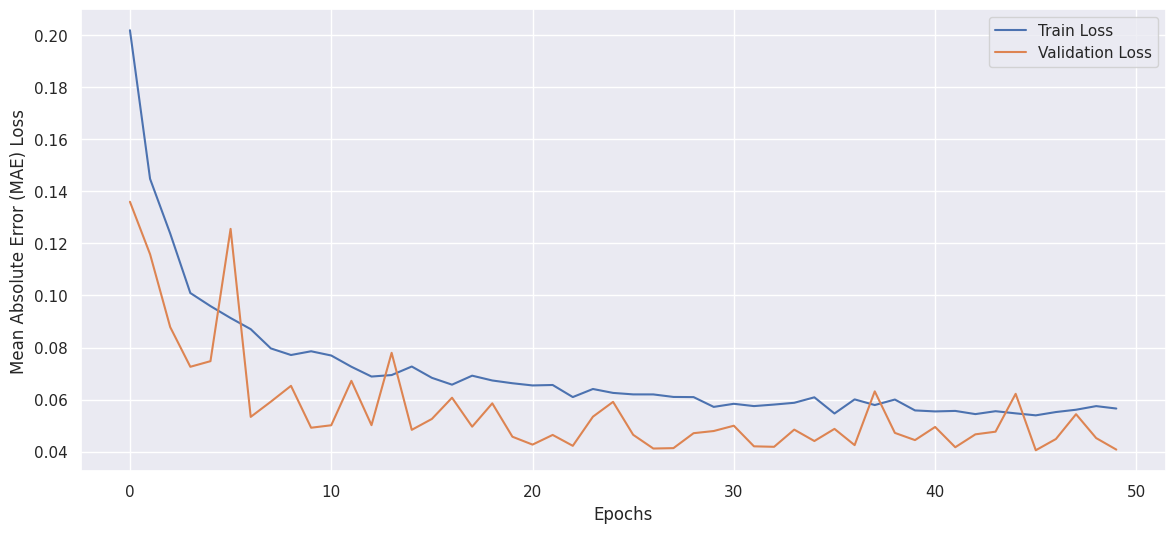

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error (MAE) Loss")
plt.legend()
plt.show()

Now that we have obtained a model with an acceptable train and validation loss, we will now use our model to predict on our test set.

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared score:", r2)

80/80 [==============================] - 1s 3ms/step
Mean squared error: 0.0030508851637864143
R-squared score: 0.9214062499594989


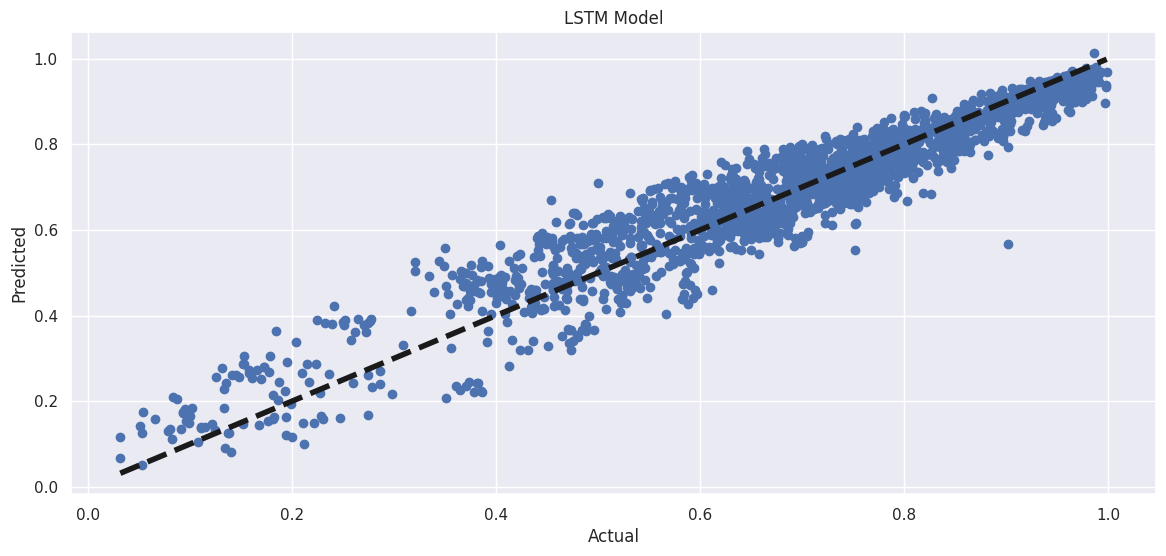

In [ ]:
# Make predictions on test set

# Plot the predicted values against the actual values
ax_lstm = plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LSTM Model')
plt.show()
lstm_scatter_x = y_test
lstm_scatter_y = y_pred
lstm_x = [y_test.min(), y_test.max()]
lstm_y = [y_test.min(), y_test.max()]

## Comparison of the two models

As we can see from the graphs below, the LSTM model shows a better testing accuracy than the linear regression model, as it has a line with slop closer to 45 degrees. The mean squared error of LSTM is about 0.00305 and $R^2$ score is about 0.9214, meaning that the model has a relatively high level of accuracy in predicting the target variable, and the predictor variables can explain about 92% of the variation in target variables. However, there might be overfitting problem in this model. If there is more data, we can train a more robust model and reduce overfit.

Text(0, 0.5, 'Predicted')

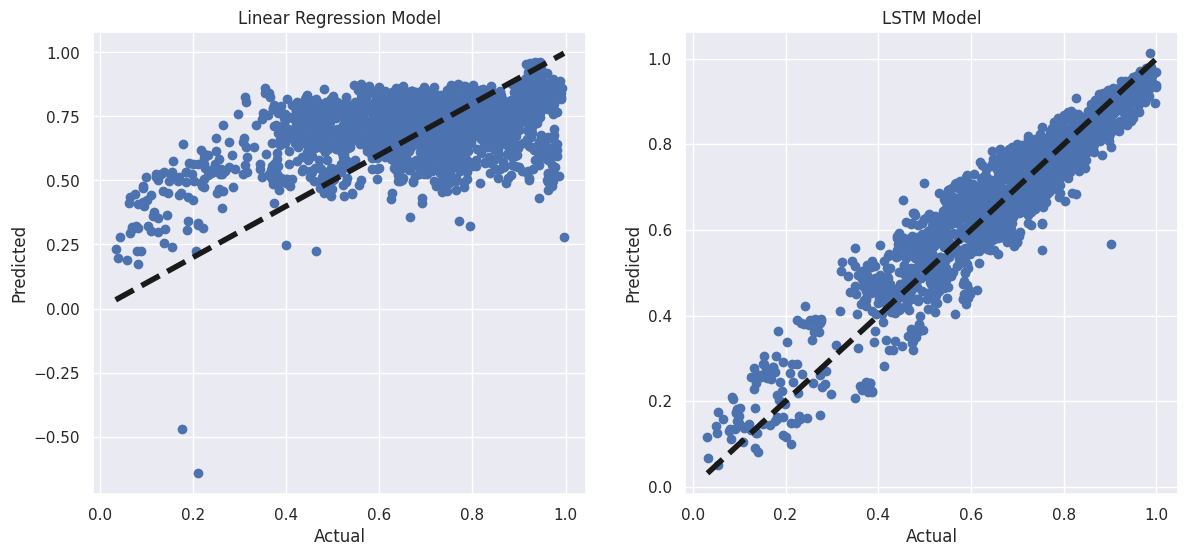

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Linear Regression Model")
plt.scatter(linear_scatter_x, linear_scatter_y)
plt.plot(linear_x, linear_y, 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.title("LSTM Model")
plt.scatter(lstm_scatter_x, lstm_scatter_y)
plt.plot(lstm_x, lstm_y, 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

As shown in the graph above, the LSTM model performed much better in terms of both R^2 and MSE values (0.003 MSE and 0.921 R^2 value compared to 0.026 MSE and 0.32 R^2 value) than the Linear Regression Model. While we initially planned to use the LSTM model to perform predictions on the whole dataset, we found it was difficult to use the scaler to inverse transform our predicted values. Moreover, we found it challenging to find other country data with which to predict our model on. If this project is further pursued, this would be a significant area of interest.

# Conclusion

In this project, we first use data cleaning techniques on our selected datasets, then we use data visualizations to show the trends in temperature, carbon dioxide emissions, GDP and sea level during Industrial Revolution period. Finally, we join the data tables into one, and train two models: linear regression and LSTM, to try predicting the temperature trends afterwards giving the temperatures during Industrial Revolution for selected countries. It turns out that LSTM performs better than linear regression on our dataset.